In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import matplotlib 
import os 

In [4]:
def domino(lol):
    # Takes a list (length n) of lists (length 2)
    # and returns a list of indices order,
    # such that lol[order[i]] and lol[order[i+1]]
    # have at least one element in common.
    # If that is not possible, multiple
    # domino chains will be created.
    # This works in a greedy way.
    
    n = len(lol)
    order = [0] # Greedy 
    link = lol[0][-1]
    links = [lol[0][0],lol[0][1]]
    while len(order)<n:
        for i in [j for j in range(n) if not j in order]:
            if link in lol[i]: # They connect
                order.append(i) # Save the id of the "stone"
                link = lol[i][0] if not(lol[i][0]==link) else lol[i][1] # The new link is the other element 
                links.append(link)
                break
    return order,links[:-1]

In [140]:
prefix="s"
qt = "2"
xyz = np.loadtxt("rotate_points.txt")
origw = np.loadtxt(f"rotate_weights.txt")
neighbours = np.loadtxt(f"rotate_neighbours.txt",dtype=int)-1 # julia starts at 1
triangles = np.loadtxt(f"rotate_triangles.txt",dtype=int)-1 # julia starts at 1 
nq = len(origw)
steps = 5 # for colorbar

w = np.round(origw,6)
suw = np.sort(np.unique(w))


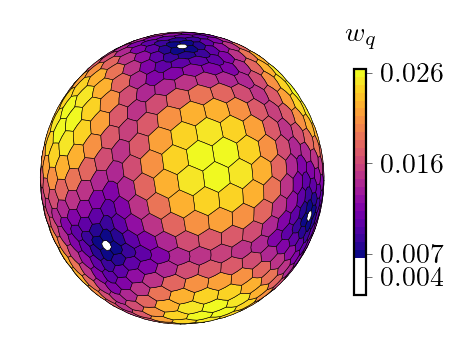

In [136]:
plt.style.use("kitishblank")
fig = plt.figure(figsize=plt.figaspect(0.8)*0.6,constrained_layout=False) #Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
ax = fig.gca(projection='3d')

cmap = plt.cm.plasma
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)
#suw = suw[1:]
# define the bins and normalize
bounds = (suw[1:]+suw[:-1])/2
bounds = np.insert(bounds,0,suw[0]-(bounds[0]-suw[0]))
bounds = np.insert(bounds,len(bounds),suw[-1]+(suw[-1]-bounds[-1]))
bounds = np.linspace(suw[1],suw[-1],len(suw)+1)
cmap.set_under('1')
norm = matplotlib.colors.BoundaryNorm(bounds ,cmap.N+1)


for center in range(nq):
    lol = [] # list of lists
    for i in neighbours[center,:]:
        if i>-1:
            lol.append(list(np.sort(triangles[i,triangles[i,:] != center])))
    order,links = domino(lol)
 
    neighx = [xyz[j,0] for j in links]
    neighy = [xyz[j,1] for j in links]
    neighz = [xyz[j,2] for j in links]

    # Get the actual hexagon that surrounds a center point
    x = []
    y = []
    z = []
    for i in range(len(order)):
        x.append((xyz[center,0]+neighx[i]) / 2)
        x.append((xyz[center,0]+neighx[i]+neighx[(i+1)%len(order)])/3)

        y.append((xyz[center,1]+neighy[i]) / 2)
        y.append((xyz[center,1]+neighy[i]+neighy[(i+1)%len(order)])/3)
        
        z.append((xyz[center,2]+neighz[i]) / 2)
        z.append((xyz[center,2]+neighz[i]+neighz[(i+1)%len(order)])/3)
        
    # Project onto sphere
    #for i in range(len(order)):
    #    tmp = (x[i]**2+y[i]**2+z[i]**2)**0.5
    #    x[i]/=tmp
    #    y[i]/=tmp
    #    z[i]/=tmp
    
    verts = [list(zip(x,y,z))]
    
    rgb = cmap(norm(w[center]))
    
    ax.add_collection3d(Poly3DCollection(verts,facecolor = rgb,linewidth=0.2,edgecolor="k",rasterized=True))
    p= ax.scatter(0*xyz[center,0],0*xyz[center,1],0*xyz[center,2],color=rgb,cmap=cmap)
l = 0.6
ax.set_xlim([-l,l])
ax.set_ylim([-l,l])
ax.set_zlim([-l,l])
plt.tight_layout()
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis("off")
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# The fix
for spine in ax.spines.values():
    spine.set_visible(False)
    
centers = (bounds[1:]+bounds[:-1])/2

lowest = suw[1] - 0.2*(suw[-1]-suw[1])
ticks = [(lowest+suw[1])/2, suw[1], (suw[1] + suw[-1])/2, suw[-1]]
ticks = [(lowest+suw[1])/2, (bounds[0]+bounds[1])/2, (suw[1] + suw[-1])/2, (bounds[-2]+bounds[-1])/2]

#ticks = centers[::steps]
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax,shrink = 0.7,
                   ticks =ticks,boundaries = np.insert(bounds,0,lowest),spacing="proportional")

ticks = [suw[0], suw[1], (suw[1] + suw[-1])/2, suw[-1]]
cbar.ax.set_yticklabels(["{:04.3f}".format(bi) for bi in ticks])

#cbar.ax.set_yticklabels(["{:06.5f}".format(bi) for bi in bounds[::step]])
cbar.ax.set_title("$w_q$")

plt.tight_layout()
fig.savefig("{}{}{}.pdf".format("oct" if qt=="2" else "ico",prefix,nq))


In [204]:
def magic(prefix,qt,values,idxn):
    xyz = np.loadtxt(f"rotate_points.txt")
    origw = values # np.loadtxt(f"rotate_weights.txt")
    neighbours = np.loadtxt(f"rotate_neighbours.txt",dtype=int)-1 # julia starts at 1
    triangles = np.loadtxt(f"rotate_triangles.txt",dtype=int)-1 # julia starts at 1 
    nq = len(origw)
    steps = 5 # for colorbar

    w = np.round(origw,6)
    suw = np.sort(np.unique(w))
    plt.style.use("kitishblank")
    fig = plt.figure(figsize=plt.figaspect(1.0)*0.6,constrained_layout=False) #Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
    ax = fig.gca(projection='3d')

    cmap = plt.cm.plasma
   # cmaplist = [cmap(i) for i in range(cmap.N)]
   # cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', cmaplist, cmap.N)
    #suw = suw[1:]
    # define the bins and normalize
   # bounds = (suw[1:]+suw[:-1])/2
   # bounds = np.insert(bounds,0,suw[0]-(bounds[0]-suw[0]))
   # bounds = np.insert(bounds,len(bounds),suw[-1]+(suw[-1]-bounds[-1]))
   # bounds = np.linspace(suw[1],suw[-1],10)#len(suw)+1)
  #  cmap.set_under('1')
    bounds = np.linspace(0,1,cmap.N) 
    norm = matplotlib.colors.BoundaryNorm(bounds,cmap.N+1)


    for center in range(nq):
        lol = [] # list of lists
        for i in neighbours[center,:]:
            if i>-1:
                lol.append(list(np.sort(triangles[i,triangles[i,:] != center])))
        order,links = domino(lol)

        neighx = [xyz[j,0] for j in links]
        neighy = [xyz[j,1] for j in links]
        neighz = [xyz[j,2] for j in links]

        # Get the actual hexagon that surrounds a center point
        x = []
        y = []
        z = []
        for i in range(len(order)):
            x.append((xyz[center,0]+neighx[i]) / 2)
            x.append((xyz[center,0]+neighx[i]+neighx[(i+1)%len(order)])/3)

            y.append((xyz[center,1]+neighy[i]) / 2)
            y.append((xyz[center,1]+neighy[i]+neighy[(i+1)%len(order)])/3)

            z.append((xyz[center,2]+neighz[i]) / 2)
            z.append((xyz[center,2]+neighz[i]+neighz[(i+1)%len(order)])/3)

        # Project onto sphere
        #for i in range(len(order)):
        #    tmp = (x[i]**2+y[i]**2+z[i]**2)**0.5
        #    x[i]/=tmp
        #    y[i]/=tmp
        #    z[i]/=tmp

        verts = [list(zip(x,y,z))]

        rgb = cmap(norm(w[center]))

        ax.add_collection3d(Poly3DCollection(verts,facecolor = rgb,linewidth=0.2,edgecolor="k",rasterized=True))
        p= ax.scatter(0*xyz[center,0],0*xyz[center,1],0*xyz[center,2],color=rgb,cmap=cmap)
    l = 0.56
    ax.set_xlim([-l,l])
    ax.set_ylim([-l,l])
    ax.set_zlim([-l,l])
    plt.tight_layout()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.axis("off")
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    # The fix
    for spine in ax.spines.values():
        spine.set_visible(False)

 #   centers = (bounds[1:]+bounds[:-1])/2

  
    #ticks = [ (bounds[0]+bounds[1])/2, (suw[1] + suw[-1])/2, (bounds[-2]+bounds[-1])/2]

    #ticks = centers[::steps]
    ticks = [0.0,1.0]
    #cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap),ax=ax,shrink = 0.75,
    #                   ticks = [0.0,1.0]  )#,
#                       ticks =ticks,boundaries =bounds,spacing="proportional")

    #ticks = [0.0,1.0]
    #cbar.ax.set_yticklabels(["{:02.1f}".format(bi) for bi in ticks])

    #cbar.ax.set_yticklabels(["{:06.5f}".format(bi) for bi in bounds[::step]])
    #cbar.ax.set_title("$w_q$")

    plt.tight_layout()
    filename = "{}_rotated_{}{}{}.png".format(str(idxn),"oct" if qt=="2" else "ico",prefix,nq)
    ax.view_init(30,45+180)
    fig.savefig(filename,dpi=600)#,rasterized=True)
    os.system("pdfcrop --margins '1 1 1 1 ' {} {}".format(filename,filename))


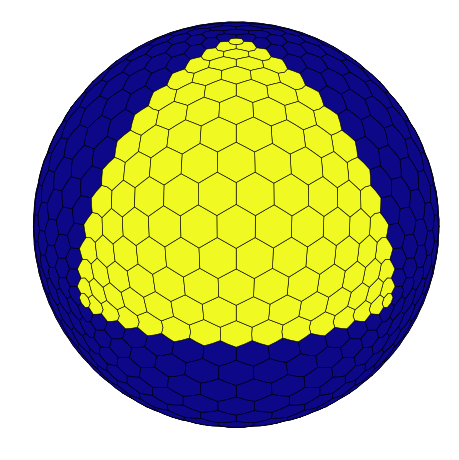

In [205]:
prefix="2"
qt = "l"
values = np.loadtxt("values_0.txt")
magic(prefix,qt,values,0)


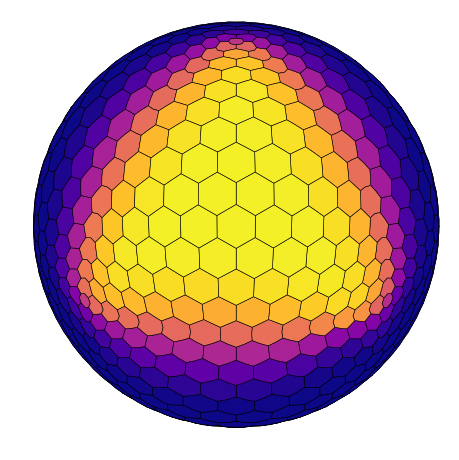

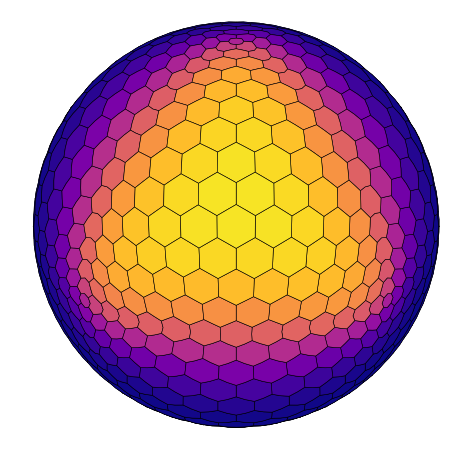

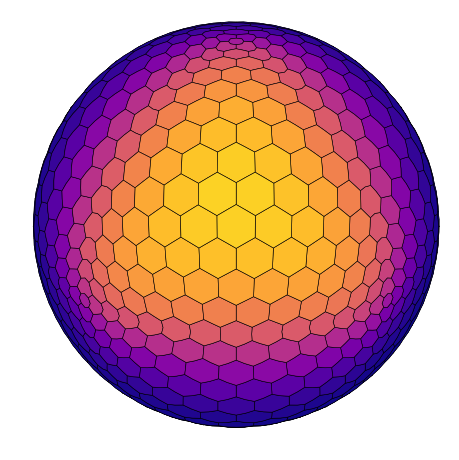

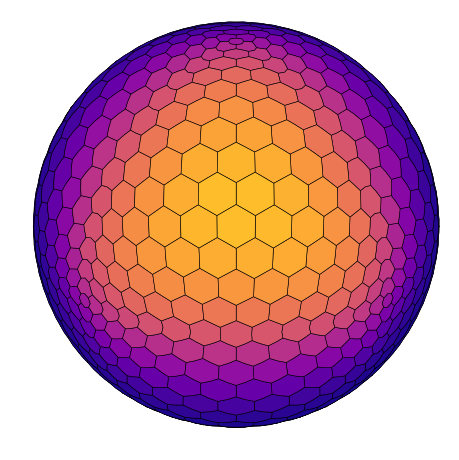

In [206]:
for i in [5,10,15,20]:
    values = np.loadtxt(f"{i}values.txt")
    magic(prefix,qt,values,i)

In [158]:
def getpatches(nq,triangles,xyz):
    for center in range(nq):
        lol = [] # list of lists
        for i in neighbours[center,:]:
            if i>-1:
                lol.append(list(np.sort(triangles[i,triangles[i,:] != center])))
        order,links = domino(lol)

        neighx = [xyz[j,0] for j in links]
        neighy = [xyz[j,1] for j in links]
        neighz = [xyz[j,2] for j in links]

        # Get the actual hexagon that surrounds a center point
        x = []
        y = []
        z = []
        for i in range(len(order)):
            x.append((xyz[center,0]+neighx[i]) / 2)
            x.append((xyz[center,0]+neighx[i]+neighx[(i+1)%len(order)])/3)

            y.append((xyz[center,1]+neighy[i]) / 2)
            y.append((xyz[center,1]+neighy[i]+neighy[(i+1)%len(order)])/3)

            z.append((xyz[center,2]+neighz[i]) / 2)
            z.append((xyz[center,2]+neighz[i]+neighz[(i+1)%len(order)])/3)

        verts = [list(zip(x,y,z))]
    return verts

In [181]:
def magic2(prefix,qt,values_many,idxn):
    xyz = np.loadtxt(f"rotate_points.txt")
    origw = values_many[0] # np.loadtxt(f"rotate_weights.txt")
    neighbours = np.loadtxt(f"rotate_neighbours.txt",dtype=int)-1 # julia starts at 1
    triangles = np.loadtxt(f"rotate_triangles.txt",dtype=int)-1 # julia starts at 1 
    nq = len(origw)

    nvalues = len(values_many)
  
    plt.style.use("kitishblank")
    fig = plt.figure(figsize=plt.figaspect(0.8/nvalues)*0.6*nvalues,constrained_layout=False) #Adjusts the aspect ratio and enlarges the figure (text does not enlarge)
    ax = fig.gca(projection='3d')
    cmap = plt.cm.plasma
    bounds = np.linspace(0,1,cmap.N) 
    norm = matplotlib.colors.BoundaryNorm(bounds,cmap.N+1)

    patches = getpatches(nq,triangles,xyz)

    for i in range(nvalues):
        rgb = [cmap(norm(wi)) for wi in values_many[i]]
        ax = fig.add_subplot(1, nvalues, i+1, projection='3d')
        ax.add_collection3d(Poly3DCollection(patches,facecolor = rgb,linewidth=0.2,edgecolor="k",rasterized=True))

        l = 0.6
        ax.set_xlim([-l,l])
        ax.set_ylim([-l,l])
        ax.set_zlim([-l,l])
        plt.tight_layout()
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        plt.axis("off")
        ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
        # The fix
        for spine in ax.spines.values():
            spine.set_visible(False)


   # ticks = [0.0,1.0]
   # cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap),ax=ax,shrink = 0.75,
  #                     ticks = [0.0,1.0]  )#,
#                       ticks =ticks,boundaries =bounds,spacing="proportional")

   # ticks = [0.0,1.0]
   # cbar.ax.set_yticklabels(["{:02.1f}".format(bi) for bi in ticks])

    #cbar.ax.set_yticklabels(["{:06.5f}".format(bi) for bi in bounds[::step]])
   # cbar.ax.set_title("$w_q$")
#
 #   plt.tight_layout()
  #  ax.view_init(30,45+180)
    #filename = "{}_rotated_{}{}{}.pdf".format(str(idxn),"oct" if qt=="2" else "ico",prefix,nq)
    #fig.savefig(filename,rasterized=True)
    #os.system("pdfcrop --margins '1 1 1 1 ' {} {}".format(filename,filename))


In [182]:
prefix="2"
qt = "l"
values_many = [ np.loadtxt("values_0.txt")]

for i in [5,10,15,20]:
    values_many.append(np.loadtxt(f"{i}values.txt"))

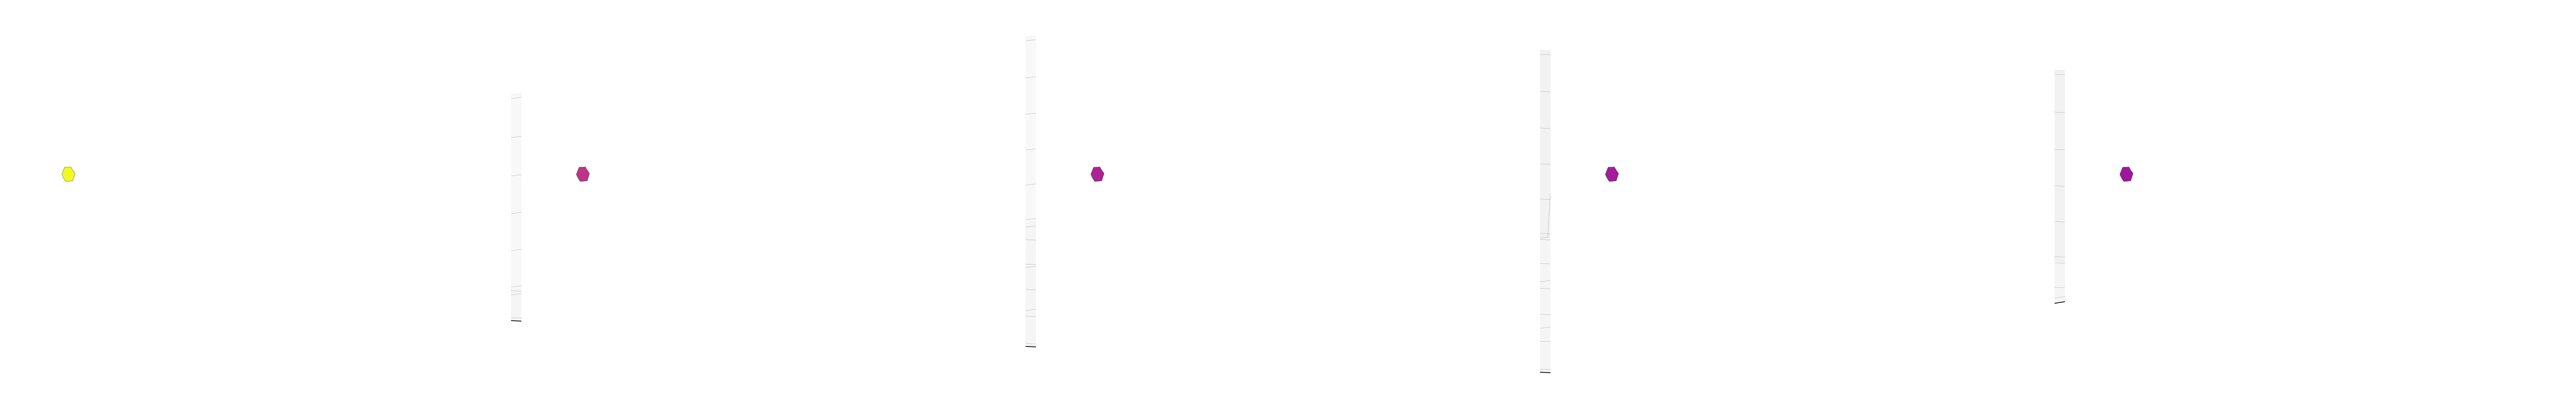

In [183]:
magic2(prefix,qt,values_many,0)
    